## ***Importing Dataset***

In [6]:
!pip install -q kaggle

In [7]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hari12121","key":"9e17566fdb38700a9e0d4f4c6ce27d37"}'}

In [8]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [9]:
! cp kaggle.json ~/.kaggle/

In [10]:
!chmod 600 /root/.kaggle/kaggle.json

In [11]:
!kaggle datasets download -d mohamedafsal007/house-price-dataset-of-india

  0% 0.00/480k [00:00<?, ?B/s]
100% 480k/480k [00:00<00:00, 125MB/s]


In [12]:
!unzip /content/house-price-dataset-of-india.zip

Archive:  /content/house-price-dataset-of-india.zip
  inflating: House Price India.csv   


## ***importing pakages***

In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

## ***Data Preprocessing***

In [61]:
#loading dataset
data = pd.read_csv('House Price India.csv')

In [62]:
data


id   Date  number of bedrooms  number of bathrooms  \
0      6762810145  42491                   5                 2.50   
1      6762810635  42491                   4                 2.50   
2      6762810998  42491                   5                 2.75   
3      6762812605  42491                   4                 2.50   
4      6762812919  42491                   3                 2.00   
...           ...    ...                 ...                  ...   
14615  6762830250  42734                   2                 1.50   
14616  6762830339  42734                   3                 2.00   
14617  6762830618  42734                   2                 1.00   
14618  6762830709  42734                   4                 1.00   
14619  6762831463  42734                   3                 1.00   

       living area  lot area  number of floors  waterfront present  \
0             3650      9050               2.0                   0   
1             2920      4000               1.5                   0   
2             2910      9480               1.5                   0   
3             3310     42998               2.0                   0   
4             2710      4500               1.5                   0   
...            ...       ...               ...                 ...   
14615         1556     20000               1.0                   0   
14616         1680      7000               1.5                   0   
14617         1070      6120               1.0                   0   
14618         1030      6621               1.0                   0   
14619          900      4770               1.0                   0   

       number of views  condition of the house  ...  Built Year  \
0                    4                       5  ...        1921   
1                    0                       5  ...        1909   
2                    0                       3  ...        1939   
3                    0                       3  ...        2001   
4                    0                       4  ...        1929   
...                ...                     ...  ...         ...   
14615                0                       4  ...        1957   
14616                0                       4  ...        1968   
14617                0                       3  ...        1962   
14618                0                       4  ...        1955   
14619                0                       3  ...        1969   

       Renovation Year  Postal Code  Lattitude  Longitude  living_area_renov  \
0                    0       122003    52.8645   -114.557               2880   
1                    0       122004    52.8878   -114.470               2470   
2                    0       122004    52.8852   -114.468               2940   
3                    0       122005    52.9532   -114.321               3350   
4                    0       122006    52.9047   -114.485               2060   
...                ...          ...        ...        ...                ...   
14615                0       122066    52.6191   -114.472               2250   
14616                0       122072    52.5075   -114.393               1540   
14617                0       122056    52.7289   -114.507               1130   
14618                0       122042    52.7157   -114.411               1420   
14619             2009       122018    52.5338   -114.552                900   

       lot_area_renov  Number of schools nearby  Distance from the airport  \
0                5400                         2                         58   
1                4000                         2                         51   
2                6600                         1                         53   
3               42847                         3                         76   
4                4500                         1                         51   
...               ...                       ...                        ...   
14615           17286            

# ***Dropping unnecessary attributes***

In [63]:
data = data.drop(['waterfront present', 'Date','number of views','id'], axis=1)
data.head()

number of bedrooms  number of bathrooms  living area  lot area  \
0                   5                 2.50         3650      9050   
1                   4                 2.50         2920      4000   
2                   5                 2.75         2910      9480   
3                   4                 2.50         3310     42998   
4                   3                 2.00         2710      4500   

   number of floors  condition of the house  grade of the house  \
0               2.0                       5                  10   
1               1.5                       5                   8   
2               1.5                       3                   8   
3               2.0                       3                   9   
4               1.5                       4                   8   

   Area of the house(excluding basement)  Area of the basement  Built Year  \
0                                   3370                   280        1921   
1                                   1910                  1010        1909   
2                                   2910                     0        1939   
3                                   3310                     0        2001   
4                                   1880                   830        1929   

   Renovation Year  Postal Code  Lattitude  Longitude  living_area_renov  \
0                0       122003    52.8645   -114.557               2880   
1                0       122004    52.8878   -114.470               2470   
2                0       122004    52.8852   -114.468               2940   
3                0       122005    52.9532   -114.321               3350   
4                0       122006    52.9047   -114.485               2060   

   lot_area_renov  Number of schools nearby  Distance from the airport  \
0            5400                         2                         58   
1            4000                         2                         51   
2            6600                         1                         53   
3           42847                         3                         76   
4            4500                         1                         51   

     Price  
0  2380000  
1  1400000  
2  1200000  
3   838000  
4   805000

In [64]:
data.dtypes

number of bedrooms                         int64
number of bathrooms                      float64
living area                                int64
lot area                                   int64
number of floors                         float64
condition of the house                     int64
grade of the house                         int64
Area of the house(excluding basement)      int64
Area of the basement                       int64
Built Year                                 int64
Renovation Year                            int64
Postal Code                                int64
Lattitude                                float64
Longitude                                float64
living_area_renov                          int64
lot_area_renov                             int64
Number of schools nearby                   int64
Distance from the airport                  int64
Price                                      int64
dtype: object

In [65]:
#changing data type
data["number of floors"] = data["number of floors"].astype(int)
data["number of bathrooms"] = data["number of bathrooms"].astype(int)
data["Longitude"] = data["Longitude"].astype(int)
data["Lattitude"] = data["Lattitude"].astype(int)

In [66]:
data.dtypes

number of bedrooms                       int64
number of bathrooms                      int64
living area                              int64
lot area                                 int64
number of floors                         int64
condition of the house                   int64
grade of the house                       int64
Area of the house(excluding basement)    int64
Area of the basement                     int64
Built Year                               int64
Renovation Year                          int64
Postal Code                              int64
Lattitude                                int64
Longitude                                int64
living_area_renov                        int64
lot_area_renov                           int64
Number of schools nearby                 int64
Distance from the airport                int64
Price                                    int64
dtype: object

In [67]:
data.isnull().any()

number of bedrooms                       False
number of bathrooms                      False
living area                              False
lot area                                 False
number of floors                         False
condition of the house                   False
grade of the house                       False
Area of the house(excluding basement)    False
Area of the basement                     False
Built Year                               False
Renovation Year                          False
Postal Code                              False
Lattitude                                False
Longitude                                False
living_area_renov                        False
lot_area_renov                           False
Number of schools nearby                 False
Distance from the airport                False
Price                                    False
dtype: bool

## ***splitting dataset***

In [115]:
X = data.drop('Price', axis=1)
y = data['Price']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=60)

In [116]:
X_train.shape

(10965, 18)

In [117]:
X_test.shape

(3655, 18)

In [118]:
Y_train.shape

(10965,)

In [119]:
Y_test.shape

(3655,)

## ***ANN model ***

1.   1 input layer
2.   7 hidden layer
3.   1 output layer



In [120]:
from keras.layers import Dropout

price = Sequential()
price.add(Dense(500, activation='relu', input_dim=X_train.shape[1]))
price.add(Dense(256, activation='relu'))
price.add(Dense(128, activation='relu'))
price.add(Dense(64, activation='relu'))
price.add(Dense(32, activation='relu'))
price.add(Dense(16, activation='relu'))
price.add(Dense(8, activation='relu'))
price.add(Dense(4, activation='relu'))
price.add(Dense(8, activation='relu'))
price.add(Dense(16, activation='relu'))
price.add(Dense(32, activation='relu'))
price.add(Dense(64, activation='relu'))
price.add(Dense(128, activation='relu'))
price.add(Dense(256, activation='relu'))
price.add(Dense(1, activation='linear'))

In [121]:
price.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

In [ ]:
history = price.fit(X_train, Y_train, epochs=250, batch_size=64, validation_data=(X_test, Y_test),diiference=(loss-val_loss))

Epoch 1/250
172/172 [==============================] - 7s 12ms/step - loss: 165553504256.0000 - mse: 165553504256.0000 - val_loss: 132991303680.0000 - val_mse: 132991303680.0000
Epoch 2/250
172/172 [==============================] - 1s 6ms/step - loss: 97033584640.0000 - mse: 97033584640.0000 - val_loss: 81041227776.0000 - val_mse: 81041227776.0000
Epoch 3/250
172/172 [==============================] - 1s 7ms/step - loss: 61451333632.0000 - mse: 61451333632.0000 - val_loss: 63149748224.0000 - val_mse: 63149748224.0000
Epoch 4/250
172/172 [==============================] - 2s 10ms/step - loss: 60457422848.0000 - mse: 60457422848.0000 - val_loss: 52280397824.0000 - val_mse: 52280397824.0000
Epoch 5/250
172/172 [==============================] - 1s 8ms/step - loss: 61497790464.0000 - mse: 61497790464.0000 - val_loss: 60603928576.0000 - val_mse: 60603928576.0000
Epoch 6/250
172/172 [==============================] - 1s 7ms/step - loss: 57528049664.0000 - mse: 57528049664.0000 - val_loss: 5

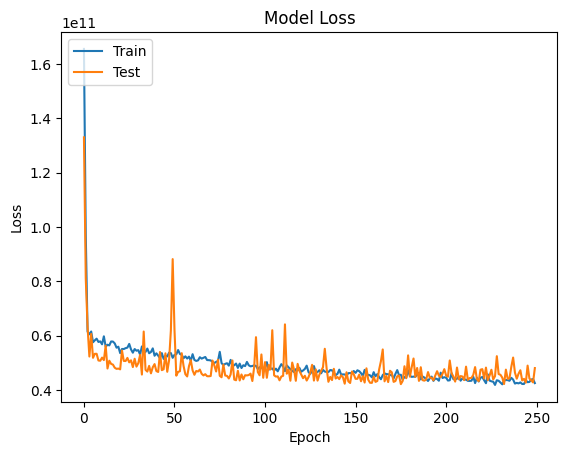

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_mse = price.evaluate(X_test, Y_test)
# Print the test loss and MSE
print('Test loss:', test_loss)
print('Test MSE:', test_mse)

115/115 [==============================] - 0s 2ms/step - loss: 48025133056.0000 - mse: 48025133056.0000
Test loss: 48025133056.0
Test MSE: 48025133056.0


## ***PREDICTING***

In [ ]:
Y_pred = price.predict(X_test)

115/115 [==============================] - 0s 2ms/step


In [ ]:
df_pred = pd.DataFrame({'Actual price': Y_test, 'Predicted price': Y_pred.flatten().astype('int')})
df_pred.head(1110)

Actual price  Predicted price
5049         340000           236054
7636         915000           618902
8395         405000           281886
8345        1500000          1963074
8747         440000           442569
...             ...              ...
14526        220000           242218
5314         512000           283338
10388        306950           278250
11800        305000           441566
3492         194000           253438

[1110 rows x 2 columns]

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(Y_test, Y_pred)
print("R2 score: ", r2)

R2 score:  0.6672116603895698
